In [ ]:
!pip install PeakUtils
%pip install TA-Lib

[*********************100%***********************]  1 of 1 completed


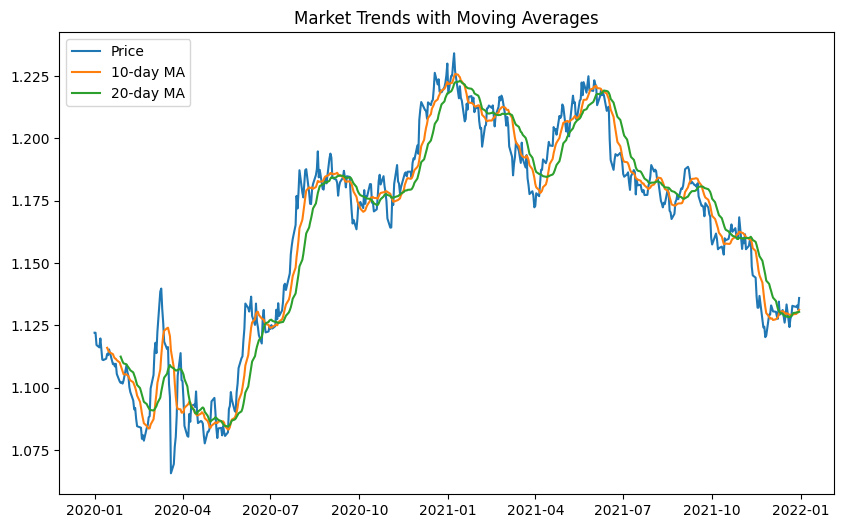

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical price data
symbol = 'EURUSD=X'
data = yf.download(symbol, start='2020-01-01', end='2021-12-31')

# Calculate the Moving Averages
data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA20'] = data['Close'].rolling(window=20).mean()

# Plot the price and MAs
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Price')
plt.plot(data['SMA10'], label='10-day MA')
plt.plot(data['SMA20'], label='20-day MA')
plt.legend(loc='upper left')
plt.title('Market Trends with Moving Averages')
plt.show()


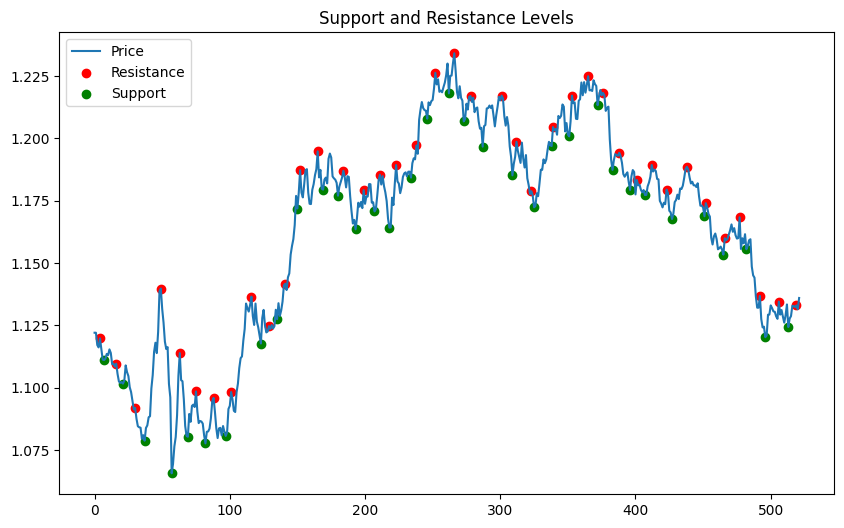

In [ ]:
import numpy as np
import peakutils

# Find support and resistance levels
price_data = data['Close'].values
resistance_indices = peakutils.indexes(price_data, thres=0.02, min_dist=10)
support_indices = peakutils.indexes(-price_data, thres=0.02, min_dist=10)

# Plot the price and support/resistance levels
plt.figure(figsize=(10, 6))
plt.plot(price_data, label='Price')
plt.scatter(resistance_indices, price_data[resistance_indices], color='red', label='Resistance')
plt.scatter(support_indices, price_data[support_indices], color='green', label='Support')
plt.legend(loc='upper left')
plt.title('Support and Resistance Levels')
plt.show()


In [ ]:
import talib

# Define the pattern functions you want to use
pattern_functions = {
    'CDL2CROWS': talib.CDL2CROWS,
    'CDL3BLACKCROWS': talib.CDL3BLACKCROWS,
    'CDLDOJI': talib.CDLDOJI,
    # ... add more patterns here
}

# Initialize a dictionary to store pattern data
pattern_data = {key: [] for key in pattern_functions.keys()}

# Find patterns in the data
for pattern_name, pattern_func in pattern_functions.items():
    pattern_data[pattern_name] = pattern_func(data['Open'], data['High'], data['Low'], data['Close'])

# Example: Print the pattern data for 'CDL2CROWS'
print(pattern_data['CDL3BLACKCROWS'])


Date
2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
             ..
2021-12-24    0
2021-12-27    0
2021-12-28    0
2021-12-29    0
2021-12-30    0
Length: 522, dtype: int32
